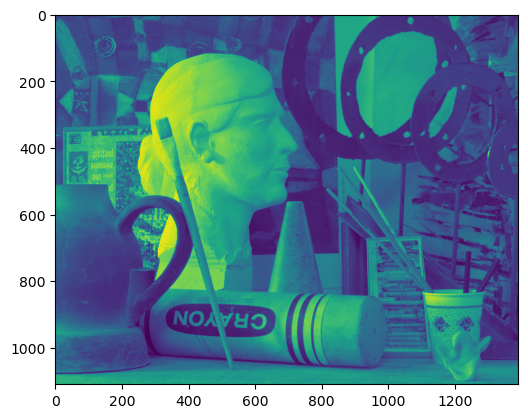

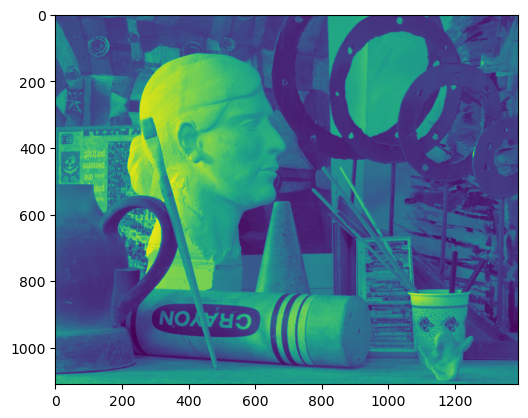

用时: 608.285224199295


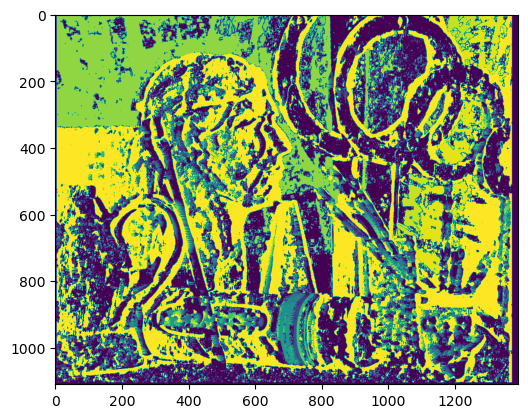

In [1]:
import os
import time
import cv2 as cv
import numpy as np
import matplotlib.pyplot as plt
from numba import jit
from PIL import Image
maxDisparity=25 #最大视差
window_size=5#滑动窗口大小

#-------------------------------
"""读取图片，请输入已经极线校准过的左图和右图，本算法不支持未校准图像的匹配"""
#------------------------------
os.chdir(r'C:\Users\wangxinyi\Documents\jupyter-notebook\计算机视觉实践-练习5\pic')
lraw=np.asanyarray(Image.open(r"view0.png"))
rraw=np.asanyarray(Image.open(r"view1.png"))
#    os.chdir(r'C:\Users\86198\Desktop\L')
#    lraw=cv.imread('ZED_image0L.png')
#    os.chdir(r'C:\Users\86198\Desktop\R')
#    rraw=cv.imread('ZED_image0R.png')


#-------------------------------
"""转换彩色图像为灰度图像，并且转为double格式"""
#------------------------------
limg= cv.cvtColor(lraw,cv.COLOR_BGR2GRAY)
rimg= cv.cvtColor(rraw,cv.COLOR_BGR2GRAY)
limg=np.asanyarray(limg,dtype=np.double)
rimg=np.asanyarray(rimg,dtype=np.double)
img_size=np.shape(limg)[0:2]
plt.imshow(limg)
plt.show()
plt.imshow(rimg)
plt.show()


#-------------------------------
"""加速后的SAD算法，具体做法是先计算右图按照视差由0到maxDisparity减去左图所得的矩阵"""
#------------------------------
tic1=time.time()
imgDiff=np.zeros((img_size[0],img_size[1],maxDisparity))
e = np.zeros(img_size)
for i in range(0,maxDisparity):
    e=np.abs(rimg[:,0:(img_size[1]-i)]- limg[:,i:img_size[1]]) #视差为多少，那么生成的图像就会少多少像素列,e负责计算视差为i时，两张图整体的差距
    e2=np.zeros(img_size) #计算窗口内的和
    for x in range((window_size),(img_size[0]-window_size)):
        for y in range((window_size),(img_size[1]-window_size)):
            e2[x,y]=np.sum(e[(x-window_size):(x+window_size),(y-window_size):(y+window_size)])#其实相当于用111 111 111的卷积核去卷积，其实就是先做差再加和以及先加和再做差的关系
        imgDiff[:,:,i]=e2
dispMap=np.zeros(img_size)


#-------------------------------
"""找到使灰度差最小的视差，并绘图"""
#------------------------------
for x in range(0,img_size[0]):
    for y in range(0,img_size[1]):
        val=np.sort(imgDiff[x,y,:])
        if np.abs(val[0]-val[1])>10:
            val_id=np.argsort(imgDiff[x,y,:])
            dispMap[x,y]=val_id[0]/maxDisparity*255#其实dispmap计算的是视差的大小，如果视差大，那么就相当于两张图片中同样物品的位移大，就是距离近
print('用时:',time.time()-tic1)
plt.imshow(dispMap)
plt.show()
